<h1>Consolidation Exercise - Cellular Automata</h1>

In today's lab session, we will learn how to implement two kinds of cellular automata (CAs). By doing so, we will review many of the fundamental programming tools that we covered in TB1, alongside getting hands on practice of using these skills to implement mathematical models. 

<h2> Introduction to Cellular Automata </h2>

A cellular automaton consists of a regular grid of *cells*, each of which can be in a finite number of *states* (i.e *on* or *off* as we will use today). An initial configuration for this grid is created by assigning an initial state to each cell. To update the model, each cell is updated in turn according to a fixed update rule that calculates the new state of a cell based on its current state and the state of the cells nearby (known as a cell's *neighbourhood*). CAs have been used to model physical processes in physics (e.g fluid or gas flow), biology (development and growth of tissues), computation, robotics and more. 

For example, we could use a CA to simulate the flow of traffic by dividing the road network into a grid, assigning *off* (or 0) to cells which correspond to sections of road with no cars on them and *on* (or 1) to represents sections which contain cars. 

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/DiscreteConcept.png?raw=true" width="80%">


For the image above, we would have an initial state of ```state = [1, 0, 0, 1, 0]```. To evolve this model, we would then update these values according to a rule-for example, we could assume each car will move to the right one space if it can (i.e. if the right neighbour cell is a 0). In our CA world, this means that each cell will move one cell to the right if and only if its right neighbour is off and our new state becomes ```state = [0, 1, 0, 0, 1]```.

We are going to start looking at Cellular Automata by implementing some *elementary cellular automata*. An elementary cellular automaton uses a 1-dimensional grid, where each cell has only two possible states (0 or 1) and the rule to determine the evolution of the system depends only on the current state of a cell and its two immediate neighbours. For example, in the image below, the value of the cell at index 4 at time t=1 (shown in red), depends on its own value (shown in green at t=0) and its neighbours (shown in blue). Elementary cellular automata were systematically studied by Stephen Wolfram in the 1980s, with some rules shown to be capable of universal (i.e almost any) computation. 

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/ElementaryCA.png?raw=true" width="80%">

<h2> Implementing CAs in Python</h2>

At the highest level of abstraction, the code for implementing any type of CA will look quite similar:

```python
#Create a data structure to represent the initial state of the system
grid = make_grid()

#Use a list to store all the grids we generate
grids = []
#Repeatedly apply the update rule for a certain number of steps
for t in range(num_steps):
  #Calculate the values in each position for the new grid
  new_grid = update_grid(grid)
  #Overwrite the old grid with the new grid
  grid=new_grid
  #Add the updated grid to our store
  grids.append(grid)

#Plot all grids we've generated to observe how the CA evolves.
plot_grid(grids)
```

In this code, we have a function that creates an initial grid for us (make_grid). We then create an additional variable (grids) to store the grid that was generated at each time step. We then apply our update rule (with the update_grid function) for a number of iterations. Finally, once our model has finished updating, we plot the output. Note that this code contains three functions (make_grid, update_grid, plot_grid) that haven't been written yet. We'll look at how to do this next!




<h3> Representing Cellular Automata with lists (or numpy arrays) </h3>

At each time step, we need to represent the current state of the cellular automata. For an elementary cellular automaton, this means we need to store a sequence of 1s and 0s. In Python, we can do this by using a *list*. For example, if we wanted to represent an elementary cellular automata of length 10 cells, with all values zero apart from the first cell, we could do this by creating a list with a '1' at the first index, and '0' everywhere else. In code, this would be written:

```python
start_with_one = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
```

While this implementation does what we want, it's also not very flexible or practical-what if we want to investigate a CA with 1000 cells? What if we want to vary the location where we put the '1'? A better way would be to use variables to represent the size of the grid and index of the '1', and a loop to construct the list. This would look something like:

In [1]:
ALIVE = 1
DEAD = 0
GRID_LENGTH = 100
#ALIVE INDEX is the index of the cell which is set to 1.
ALIVE_INDEX = 10

CA_grid = []
for index in range(GRID_LENGTH):
  if index == ALIVE_INDEX:
    CA_grid.append(ALIVE)
  else:
    CA_grid.append(DEAD)

print(CA_grid)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Note that we can also represent the grid with a numpy array, and doing so lets us achieve the same thing with a bit less code. If you haven't seen (or have forgotten how to use numpy), you can get a quick introduction (or refresher) <a href=https://numpy.org/doc/stable/user/absolute_beginners.html>here</a>. We'll take a more detailed look at numpy next week. Using numpy, we could write:

In [1]:
import numpy as np
ALIVE = 1
DEAD = 0
GRID_LENGTH = 100
#ALIVE INDEX is the index of the single cell which is set to 1.
ALIVE_INDEX = 10
CA_grid = np.zeros(GRID_LENGTH, dtype=np.int8)
CA_grid[ALIVE_INDEX] = ALIVE

print(CA_grid)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Here, we've used the in-built numpy function *zeros* to quickly create an array of all zeros of the required length. This function requires one argument - the size of the array. One of the key differences between numpy arrays and Python lists is that while a list can contain different types of data (i.e you can create ```python my_list = [1, 'a', None])```, numpy arrays must all be the same type of data. Here, we use the optional dtype argument to specify that we want our array to consist of 8 bit integers (i.e integers represented by 8 bits, allowing us to represent numbers from 0 - (2^8)-1 = 255). As our state will either be a 0 or 1, this is plenty. We've done this to make it easier to plot the output- the program should still execute correctly if you remove it as  numpy will default to using floats instead). 

A further benefit of using numpy arrays is that we can easily display the grid we've created using matplotlib.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
ALIVE = 1
DEAD = 0
GRID_LENGTH = 100
#ALIVE INDEX is the index of the single cell which is set to 1.
ALIVE_INDEX = 10
CA_grid = np.zeros(GRID_LENGTH, dtype=np.int8)
CA_grid[ALIVE_INDEX] = ALIVE

#Make a figure object, with size 10x10
fig = plt.figure(figsize=(10, 10))
#Create an axes object within the figure
ax = plt.axes()
#Turn off the xy axes
ax.set_axis_off()
#Make a 1 x GRID_LENGTH array for plotting
image = np.zeros((1, GRID_LENGTH), dtype = np.int8)
#Copy CA_grid into the image array
image[0, :] = CA_grid
#Display the image
ax.imshow(image, interpolation='none', cmap='RdPu')
#Display the plot on the screen for 3 seconds
plt.show()

Here, we've used the line ```python fig=plt.figure()``` to make an empty matplotlib figure. We then add a figure axes with ```python ax = plt.axes()```, turn off the xy axes with the line ```python ax.set_axis_off()```. The line ```python ax.imshow(image)``` then displays the grid as an image using a simple encoding- cells with a zero in them are white, while cells with a 1 in them are black. The final line ```python plt.show()``` tells matplotlib to display the plot on the screen. 

<h3> Exercise 1</h3>

While the code snippets above will both do what we want- make an initial grid with a single cell set to '1', ideally we'd like these implemented as functions, with parameters taken as inputs. 

**Exercise:** Complete the code snippet below by writing functions that create the following initial grids:

1. A singleton grid (everywhere is zero apart from one location) - this function should take two parameters (the length of the grid and the index that should be set to one). 
2. A random grid (each cell is set to 1 with some probability p, and is zero otherwise). To help you with this, you may want to import the Python library *random*. This will allow you to generate a random number between 0 and 1 by calling the function random.random(). 

In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
import random
ALIVE = 1 
DEAD = 0 
GRID_LENGTH = 100
#ALIVE INDEX is the index of the single cell which is set to 1.
ALIVE_INDEX = 10
#ALIVE probability is the fraction of a random grid which is set to 1.
ALIVE_PROBABILITY = 0.1 

def create_singleton_grid(length, alive_index):
  '''
  Make a grid of specified length with all cells apart from one set to zero.
  Inputs:
    length (integer) - the size of the grid
    alive_index (integer) - the index of the cell which is set to one.
  Returns:
    grid (numpy array)
  '''
  grid = np.zeros(length, dtype=np.int8)
  #Your code goes here
  grid[alive_index] = ALIVE
  



  return grid

def create_random_grid(length, alive_probability):
  '''
  Make a grid of specified length with cells randomly set to one or zero, with probability p.
  Inputs:
    length (integer) - the size of the grid.
    alive_probability (float) - the probability that any cell is set to a 1.
  Returns:
    grid (numpy array)
  '''

  grid = np.zeros(length, dtype=np.int8)

  #Your code goes here 
  for c in range(length):
    random_num = random.random()  

    if random_num < alive_probability:
      grid[c] = ALIVE
    else:
      grid[c] = DEAD

  return np.array(grid, dtype=np.int8)

grid1 = create_singleton_grid(GRID_LENGTH, ALIVE_INDEX)
print("Grid 1")
print(grid1)
'''
#This code will plot grid 1 - uncomment to run
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax1.set_axis_off()
image1 = np.zeros((1, GRID_LENGTH), dtype = np.int8)
#Copy CA_grid into the image array
image1[0, :] = grid1
#Display the image
ax1.imshow(image1, interpolation='none', cmap='RdPu')
plt.show()
'''

grid2 = create_random_grid(GRID_LENGTH, ALIVE_PROBABILITY)
print("Grid 2")
print(grid2)

'''
#This code will plot grid 2 - uncomment to run
ax2 = fig.add_subplot(212)
ax2.set_axis_off()
image2 = np.zeros((1, GRID_LENGTH), dtype = np.int8)
#Copy CA_grid into the image array
image2[0, :] = grid2
#Display the image
ax2.imshow(image2, interpolation='none', cmap='RdPu')
plt.show()
'''

#Jupyter Notebook prints multi-line strings unless there is code after them - this line prevents it from being printed as the output
pass



Grid 1
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Grid 2
[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


<h3> Implementing an update rule</h3>

Now that we can make our initial grids, the next step is to write the code that will update the state of the CA based on an update rule. In terms of our high level view of the code, we need to now write the ```python update_grid()``` function.

```python
#Create a data structure to represent the initial state of the system
grid = make_grid()

#Use a list to store all the grids we generate
grids = []
#Repeatedly apply the update rule for a certain number of steps
for t in range(num_steps):
  #Calculate the values in each position for the new grid
  new_grid = update_grid(grid)
  #Overwrite the old grid with the new grid
  grid=new_grid
  #Add the updated grid to our store
  grids.append(grid)

#Plot all grids we've generated to observe how the CA evolves.
plot_grid(grids)
```

We can decompose the update_grid() function into two separate jobs. Firstly, we need to write some code to calculate the new value for a location by applying the local rule. For our first update rule, we'll use the rule that an element should be set to 1 if  its current value is 0 and the left neighbour is 1. Otherwise, it should be zero. Intuitively, this should have the effect of moving the 1s in the grid to the right. 

Secondly, we need to write some code to iterate through our grid, building a new grid by applying the update rule to each element in turn. 

<h4> Boundary Conditions</h4>

One thing we need to be careful when we do write this loop, is how we deal with the far right and far left elements- we might be tempted to do something like

```python
for index in range(GRID_LENGTH):
  left_neighbour = old_grid[0, index-1]
  right_neighbour = old_grid[0, index+1]
  old_value = old_grid[0, index]

  new_value = update_cell(old_value, left_neighbour, right_neighbour)
```

Unfortunately, if you try this, you'll get an error when you try to assign the right_neighbour value for the rightmost element of the grid. If our grid has a size of 100, then the rightmost value will have an index of 99. When we try to access element 99+1=100, we'll get an IndexError (as we've tried to access an element of a list that doesn't exist - remember, Python starts indexing lists at 0). The problem here is that we haven't defined the *boundary conditions* for our system. In general, boundary conditions for a system like this can be *constant*, *absorbing* or *circular*, and the correct one to use will depend on the details of the system you want to model. Here, we'll arbitrarily choose to use *circular* boundary conditions, which means that we'll define the right neighbour of the rightmost (i.e index 99) index to be the left most index (i.e index 0), and similarly the left neighbour of the left most index (index 0) to be the rightmost neighbour (i.e index 99). Essentially, we model the road as wrapping around to form a continuous circle. We can implement this by using a series of if-then-else statements, or by exploiting the modulo (```python % ```)operator. This operator returns the remainder when the first argument is divided by the second argument - i.e 5 % 3 = 2, 99 % 99 = 0, 100 % 99 = 1.  


<h3> Exercise 2</h3>

**Exercise:** Complete the code below to implement and test the update_grid functionality. 

1. In a seminar in TB1, we discussed the importance of using *automated* testing to ensure our code is producing the correct output. CAs are particularly amenable to this kind of testing. We've added two *incomplete* test functions to the code-please add the additional tests to ensure all inputs are producing the right output.

2. Complete the update_grid code so that all tests pass.


Testing update value

Tests passed
Testing update grid

Tests passed
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


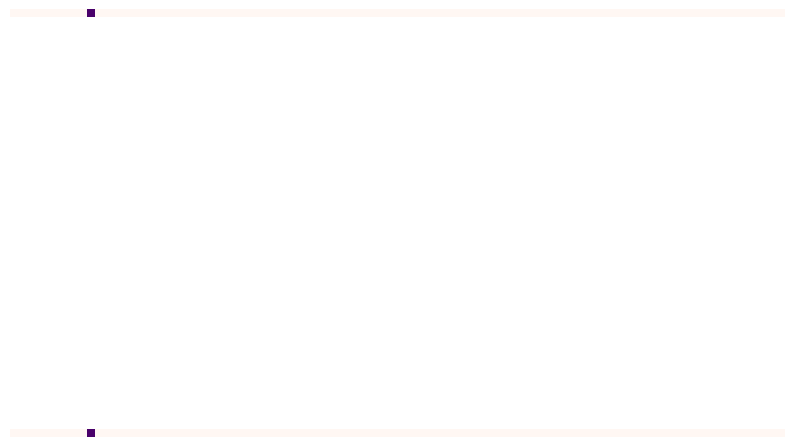

In [29]:

def update_cell(old_value, left_neighbour, right_neighbour):
  '''
  Calculates the new value for a cell given the old value and the values of the left and right neighbours
  Inputs:
    old_value (integer)
    left_neighbour (integer)
    right_neighbour (integer)
  Returns:
    new_value (integer)
  '''

    

  new_value = 0 
  #Your code goes here

  if old_value == 0 and left_neighbour == 1:
    new_value = 1
  else:
    new_value = 0
  
  return new_value

def update_grid(old_grid, rule=None):
  '''
  Update the values within a grid according to local rules.
  Inputs:
      old_grid (numpy array)
  Returns:
    new_grid (numpy array)
    '''

  new_grid = []

  #Your code goes here

  for i in range(len(old_grid)):
    value = old_grid[i]
    left = old_grid[(i-1)%len(old_grid)]
    right = old_grid[(i+1)%len(old_grid)]
    new_grid.append(update_cell(value,left,right))

  return np.array(new_grid, dtype=np.int8)

def test_update_cell():

  assert update_cell(0,0,0)==0, "test 1"
  assert update_cell(1,0,0)==0, "test 2"
  assert update_cell(0,1,0)==1, "test 3"
  assert update_cell(0,0,1)==0, "test 4"
  assert update_cell(1,1,0)==0, "test 5"
  assert update_cell(1,0,1)==0, "test 6"
  assert update_cell(0,1,1)==1, "test 7"
  assert update_cell(1,1,1)==0, "test 8"
  #Add the rest of the tests here - you should cover inputs of (0, 1, 1) and (1, 1, 1)

def test_update_grid():

  assert (update_grid((np.array([1, 0, 0], dtype=np.int8)))==np.array([0, 1, 0], dtype=np.int8)).all()==True
  assert (update_grid((np.array([0, 1, 0], dtype=np.int8)))==np.array([0, 0, 1], dtype=np.int8)).all()==True
  assert (update_grid((np.array([0, 0, 1], dtype=np.int8)))==np.array([1, 0, 0], dtype=np.int8)).all()==True
  assert (update_grid((np.array([1, 1, 1], dtype=np.int8)))==np.array([0, 0, 0], dtype=np.int8)).all()==True
  assert (update_grid((np.array([0, 0, 0], dtype=np.int8)))==np.array([0, 0, 0], dtype=np.int8)).all()==True  
  assert (update_grid((np.array([0, 1, 1], dtype=np.int8)))==np.array([1, 0, 0], dtype=np.int8)).all()==True
  assert (update_grid((np.array([1, 1, 0], dtype=np.int8)))==np.array([0, 0, 1], dtype=np.int8)).all()==True
  assert (update_grid((np.array([1, 0, 1], dtype=np.int8)))==np.array([0, 1, 0], dtype=np.int8)).all()==True

  #Add more tests here - for a length 3 grid, you should have 8 possible initial states to test.

print("Testing update value\n")
test_update_cell()
print("Tests passed")
print("Testing update grid\n")
test_update_grid()
print("Tests passed")

grid1 = create_singleton_grid(GRID_LENGTH, ALIVE_INDEX)
grid2 = update_grid(grid1)

print(grid1)
print(grid2)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax1.set_axis_off()
image1 = np.zeros((1, GRID_LENGTH), dtype = np.int8)
#Copy CA_grid into the image array
image1[0, :] = grid1
#Display the image
ax1.imshow(image1, interpolation='none', cmap='RdPu')

ax2 = fig.add_subplot(212)
ax2.set_axis_off()
image2 = np.zeros((1, GRID_LENGTH), dtype = np.int8)
#Copy CA_grid into the image array
image2[0, :] = grid1
#Display the image
ax2.imshow(image2, interpolation='none', cmap='RdPu')
plt.pause(10)

<h3> Putting it all together</h3>

Now that we've written the functions that we need for our model, we can write a main function to combine everything together. The file "CA.py" contains a main function and the empty function headers that you've implemented so far. Copy your code into "CA.py" and make sure everything runs as it should. When I run my code with a random configuration (alive probability of 20%) for 10 steps, I get the following image:

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/CA_example.png?raw=true">

Now that we've seen how to implement our first cellular automaton, it's time for you to have a go with a slightly different (2D) CA.

<h2> The game of life </h2>
Perhaps the most famous example of the cellular automata, is the Game of Life, developed in the 1970s by John Conway (and sometimes known as "Conway's game of life to disambiguate from the board game with the same name). This model showed how complex behaviours can emerge from a relatively simple set of rules (more info available <a href=https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life>here</a>). The image below shows an example of running the game of life for 100 timesteps (ignore the colours which are an artefact of the process used to turn the images into a gif- we only have two states here).

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/GoL.gif?raw=true" width="60%">

Unlike the elementary CA we've implemented, the Game of Life uses a regular 2D grid. This means that the new value of an cell (shown in blue) depends on the 8 neighbouring cells (shown in red)

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/GoL_neighhbourhood.png?raw=true">

The update rule for the game of life is as follows:

1. *Birth rule*: An element that is currently 0 with exactly 3 neighbours is set to 1.
2. *Death rule 1 (loneliness)*: An element that is currently 1 with 1 or less neighbours is set to 0.
3. *Death rule 2 (starvation)*: An element that is currently 1 with 4 or more neighbours is set to 0.
4. *Survival rule*: An element that is currently 1 with 2 or 3 neighbours is set to 1.

This seemingly simple set of rules can create complex, self-repeating patterns such as the "glider gun" shown below (image from wikipedia).

<img width="30%" src="https://upload.wikimedia.org/wikipedia/commons/e/e5/Gospers_glider_gun.gif"/>

<h3> Exercise 3</h3>

Working in pairs, implement the game of life. As with the elementary CA, you'll need a function for initialising a starting grid (random is fine), for updating the grid, and for displaying the grid (here, it's fine to just display the current state of the grid rather than all previous grids as we did for the elementary CA). You'll also need to think about how to store the grid now that it's 2D rather than 1D (**hint** a nested list would work, but you'll find it much easier if you use a 2D numpy array). 

You should also include some *test functions* to ensure your code is working correctly.

**Submission** This code will be submitted (in pairs) as your third consolidation exercise. Both pairs should update identical code to Blackboard by (date_goes_here). Your code should be submitted as a single file ("GoL.py"). When I run your code, it should create a 100 x 100 grid, updating and plotting the evolution of the model for 100 time steps. 

Feedback for this assignment will focus on your use of test functions, your use of functions to organise code, and your adherence to the unit style guide.


<h2> Exploring further update rules for elementary cellular automata </h2>

In the exercise above, we looked at one possible update rule for our cellular automata. In fact, there are many (256) other rules that we could have looked at. A scheme for understanding the various update rules for elementary CAs was proposed by Stephen Wolfram. The key insight is that as the update rule only looks at 3 cells, and each cells can only be a one or a zero, there are 2^3 = 8 possible states for these three cells. An update rule can then be described by writing down the new value that corresponds to each of these states. For example, the rule we implemented assigned a 1 to a cell if its current value was 0 and its left neighbour was 1. This corresponds to the rule:

| 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000 |
|-----|-----|-----|-----|-----|-----|-----|-----|
| 0   | 0   | 1   | 1   | 0   | 0   | 0   | 0   |

As the bottom row describes a binary number (00110000 = 48), this is known as rule 48.

<h3> Exercise 4</h3> 
Modify your CA code to include a generalised update_value function. Alongside the current values of the cell and its two neighbours, this function should also take a rule (specified as an integer) as an input. It should then use the update rule that corresponds to that integer to update the grid. Extend your code to optionally read the rule to be used from the command line. The function below for converting an integer into a binary number may be helpful. **hint** You only need to use if-then-else statements to implement the generalised update rule!

```python
def convert_int_to_binary(rule):
  rule = format(rule, '#010b')[2:]
  return rule 
```